## Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import nltk
import re
import string
import sklearn
import time

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tensorflow import keras
from keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform, randint

import import_ipynb
import capstone_functions_04
from capstone_functions_04 import save_plot_function, plot_learning_curve, learning_curve_function

In [3]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

## Import CNN.csv and clean_df for train test indices 

In [5]:
# load combined text
cnn_df = pd.read_csv('../data/cnn_combined_text.csv')

# target variable csv
y = pd.read_csv('../data/y_labels.csv')

In [6]:
# convert combined text into string values
texts = cnn_df['combined_text'].astype(str).values

In [7]:
# assign y for train test split
y = y['fraudulent']

In [8]:
# Tokenize
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_len = 200  # adjust based on EDA
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [9]:
train_indices, test_indices = train_test_split(np.arange(len(texts)), test_size=0.2, stratify=y, random_state=42)

X_train = X_padded[train_indices]
X_test = X_padded[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [10]:
# build CNN model 
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

C:\Users\hjame\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# train model 
history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9351 - loss: 0.2408 - val_accuracy: 0.9718 - val_loss: 0.0918
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9813 - loss: 0.0644 - val_accuracy: 0.9824 - val_loss: 0.0654
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9935 - loss: 0.0256 - val_accuracy: 0.9831 - val_loss: 0.0744
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9831 - val_loss: 0.1004
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9831 - val_loss: 0.1248


In [13]:
# evaluate 
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9804 - loss: 0.1243
Test Accuracy: 0.9803


In [17]:
# y_pred and y_probs 
y_pred_probs = cnn_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten() # converts probabilities to 0 or 1

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


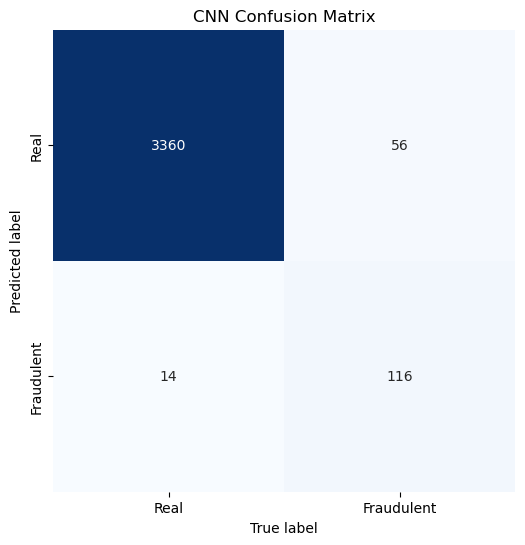

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image160.png


In [19]:
# confusion matrix
# plot confusion matrix 
cnn_cm_01 = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
confuseLabels = ('Real', 'Fraudulent')

# Confusion Matrix
sns.heatmap(cnn_cm_01.T, square= True, annot= True, fmt= 'd',cbar= False, 
            cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# Title 
ax.set_title('CNN Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')

save_plot_function(160)

In [31]:
cnn_report = classification_report(y_test,y_pred)

In [33]:
print(cnn_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3374
           1       0.89      0.67      0.77       172

    accuracy                           0.98      3546
   macro avg       0.94      0.84      0.88      3546
weighted avg       0.98      0.98      0.98      3546



In [27]:
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

C:\Users\hjame\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


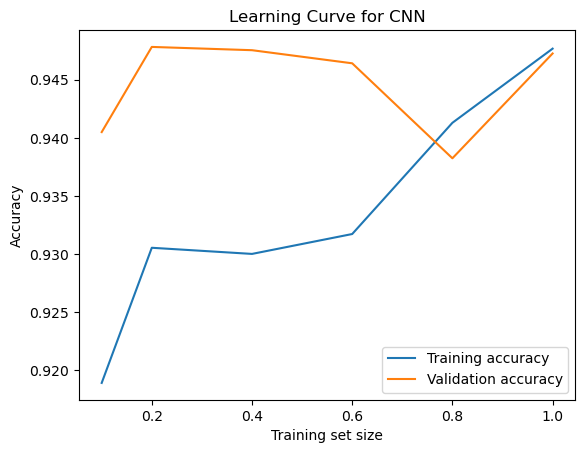

In [29]:
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
train_scores = []
val_scores = []

for train_size in train_sizes:
    # Subset the training data
    n_samples = int(len(X_train) * train_size)
    X_subset = X_train[:n_samples]
    y_subset = y_train[:n_samples]

    # Create and train a fresh model
    model = build_cnn_model()
    history = model.fit(X_subset, y_subset,
                        epochs=5,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=0)

    # Evaluate and store scores
    train_scores.append(history.history['accuracy'][-1])
    val_scores.append(history.history['val_accuracy'][-1])

# Plot learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for CNN')
plt.legend()
plt.show()